In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

## ML assignment 2

### Maciej Glowacki, University of Bristol (CDT student)

In [28]:
df = pd.read_csv("data/diabetes.csv")

In [29]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Exploring the dataset

In [30]:
print(f"dataframe shape: {df.shape}")

dataframe shape: (2000, 9)


In [31]:
#covariance matrix to gauge feature importance 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


looks like Age, BMI, Glusoce and Pregnancies are the the disciminating features. Let's insepect these

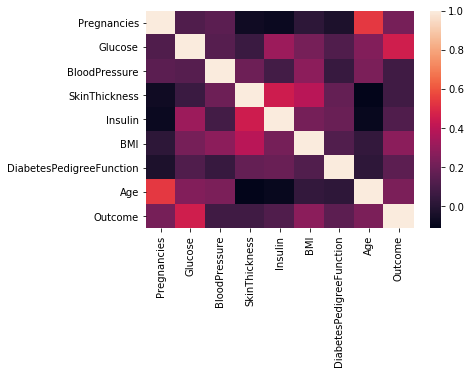

In [32]:
#visualise this
plt.figure()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)
plt.show()

In [33]:
df.groupby(by='Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,1316,1316,1316,1316,1316,1316,1316,1316
1,684,684,684,684,684,684,684,684


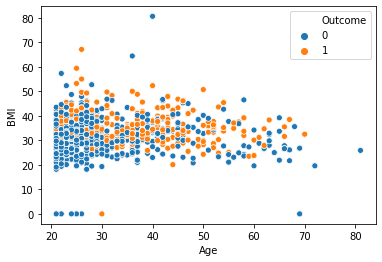

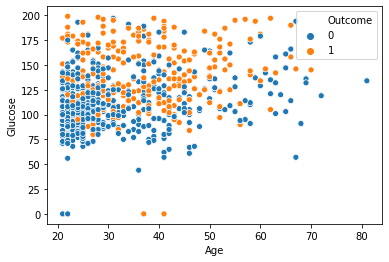

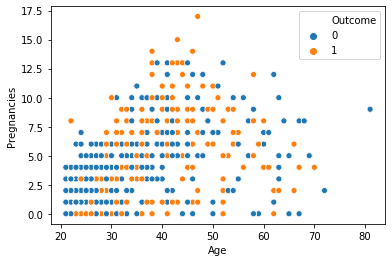

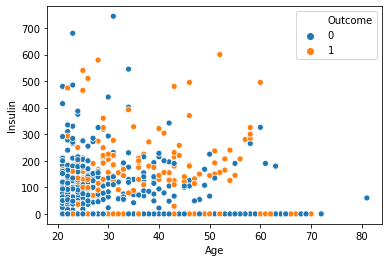

In [34]:
for feature in ['BMI', 'Glucose', 'Pregnancies', 'Insulin']:
    sns.scatterplot(df['Age'],df[feature],hue = df['Outcome'])
    plt.show()

### Training simple feed-forward neural net

In [35]:
features = df.iloc[:,0:8].values
target   = df.iloc[:,-1].values

In [36]:
scaler=StandardScaler()
X = scaler.fit_transform(features)
y = target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
#define keras model

def FNN(optimizer="adam", dropout=0.1, init='uniform', n_features=8, dense_nparams=32, hidden_layers=1):
    model = Sequential()
    for i in range(int(hidden_layers)):
        model.add(Dense(dense_nparams, activation='relu', input_shape=(n_features,), kernel_initializer=init,)) 
        model.add(Dropout(dropout), ) #dropout to reduce feature dependence 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

In [39]:
model = KerasClassifier(build_fn=FNN, verbose=1) #build model 

In [40]:
#nn_pipe = Pipeline([('ss', StandardScaler()), #can build-pipeline to automise feature preperation that is show explicitly above.
 #                   ("nn", fnn_clf)])

In [41]:
#hyperparmas to tune

param_grid = {
    'hidden_layers' : [1,2,4],
    'epochs': [1,10,100],
    'dense_nparams': [16, 32, 256],
    'init': ['uniform', 'zeros', 'normal'], 
    'batch_size': [2, 16, 32],
    'optimizer': ['SGD', 'Adam'],
    'dropout': [0.4, 0.1, 0.0]
}

In [42]:
#hyperparam tuning with k-fold cross validation 

kfold_splits = 4
grid = GridSearchCV(estimator=model,  
                    n_jobs=-1, #all available cores for training
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid)

In [43]:
grid_result = grid.fit(X_train, y_train)  

Fitting 4 folds for each of 1458 candidates, totalling 5832 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 107.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 179.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 212.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 222.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 238.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 247.2min
[Parallel(n_jobs=-1)]: Done 5832 out of 5832 | elapsed: 257.7min finished


Epoch 1/100
750/750 [==============================] - 4s 1ms/step - loss: 0.5263 - accuracy: 0.7402: 0s - loss: 0.5282 - accuracy: 0.
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4632 - accuracy: 0.7909
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4620 - accuracy: 0.7886
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8074
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8016
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.4048 - accuracy: 0.8184
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3874 - accuracy: 0.8236
Epoch 8/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3838 - accuracy: 0.8130
Epoch 9/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8456
Epoch 10/100
750/750 [==============================] - 1

750/750 [==============================] - 1s 1ms/step - loss: 0.0568 - accuracy: 0.9799
Epoch 81/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0501 - accuracy: 0.9835
Epoch 82/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0848 - accuracy: 0.9769
Epoch 83/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9840
Epoch 84/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0761 - accuracy: 0.9906
Epoch 85/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1284 - accuracy: 0.9766
Epoch 86/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9901
Epoch 87/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0831 - accuracy: 0.9838
Epoch 88/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.9870: 0s
Epoch 89/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0527 - accura

In [44]:
print(f"Best accuracy: {grid_result.best_score_}, Best Params: {grid_result.best_params_}")

Best accuracy: 0.9493333250284195, Best Params: {'batch_size': 2, 'dense_nparams': 256, 'dropout': 0.1, 'epochs': 100, 'hidden_layers': 4, 'init': 'uniform', 'optimizer': 'Adam'}


In [115]:
#grid_result.cv_results_

In [46]:
#inspect grid-search results:

#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))


### Results

Carried out grid-search and found optimal values for batch size, epochs, number of network parameters and number of hidden-layers to be optimised and drop-out rate leading to an accurcy score of ~90%.